C:\Users\munky\AppData\Local\Temp\ipykernel_17236\2664084650.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(data_file, delim_whitespace=True)


         temp       salt       press
0   30.608471  34.254044    0.494025
1   30.599207  34.264446    1.541375
2   30.581543  34.275578    2.645669
3   30.564642  34.283661    3.819495
4   30.551281  34.289604    5.078224
5   30.542446  34.295010    6.440614
6   30.537460  34.300400    7.929560
7   30.534828  34.305912    9.572997
8   30.532602  34.311672   11.405000
9   30.529015  34.317478   13.467140
10  30.523439  34.323189   15.810070
11  30.515306  34.330971   18.495560
12  30.500172  34.343994   21.598820
13  30.474586  34.367043   25.211411
14  30.429401  34.414421   29.444731
15  30.366610  34.477116   34.434151
16  30.274498  34.557217   40.344051
17  30.141117  34.632065   47.373692
18  29.925632  34.674915   55.764290
19  29.619251  34.707600   65.807266
20  28.923849  34.773766   77.853851
21  27.720699  34.874378   92.326073
22  25.761702  34.939251  109.729302
23  23.235125  35.080330  130.666000
24  20.093561  34.919315  155.850693
25  18.194742  35.107697  186.125595
2

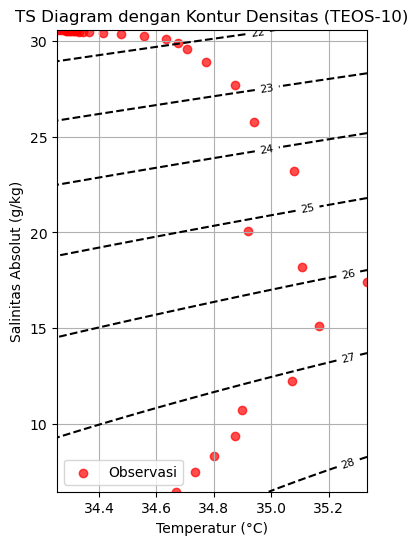

In [1]:
import numpy as np
import pandas as pd
import gsw  # Library TEOS-10
import matplotlib.pyplot as plt

# 1. Membaca data dari file teks
data_file = "TS_halmahera.txt"
data = pd.read_csv(data_file, delim_whitespace=True)
print(data)

# Pastikan kolom sesuai
temperature = data["temp"].values  # Temperatur in-situ (°C)
salinity = data["salt"].values  # Salinitas Absolut (g/kg)
pressure = data["press"].values  # Tekanan (dbar)

# 2. Menghitung densitas menggunakan TEOS-10
# Mengonversi Salinitas Absolut (g/kg) ke Salinitas Praktis jika diperlukan
density = gsw.density.rho(salinity, temperature, pressure)

# 3. Membuat grid TS untuk kontur densitas
S_range = np.linspace(np.min(salinity), np.max(salinity), 100)
T_range = np.linspace(np.min(temperature), np.max(temperature), 100)
S_grid, T_grid = np.meshgrid(S_range, T_range)

# Hitung densitas untuk grid
P_grid = np.mean(pressure)  # Asumsi tekanan rata-rata
density_grid = gsw.density.rho(S_grid, T_grid, P_grid)

# 4. Plot TS Diagram dengan kontur densitas
plt.figure(figsize=(4, 6))
#contour = plt.contourf(S_grid, T_grid, density_grid, levels=50, cmap="viridis")
contour = plt.contour(S_grid, T_grid, density_grid-1000, colors='black',linestyles='dashed')
plt.clabel(contour, inline=True, fontsize=8)
#cbar = plt.colorbar(contour)
#cbar.set_label("Densitas (kg/m³)")

# Tambahkan data titik untuk observasi
plt.scatter(salinity,temperature,c="red", label="Observasi", alpha=0.7)

# 5. Label dan grid
plt.title("TS Diagram dengan Kontur Densitas (TEOS-10)")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Salinitas Absolut (g/kg)")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()